[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/samdavanloo/ISE-ML/blob/main/3_classification.ipynb)

# Classification
## Logistic regression
Logistic regression is a classification model that is very easy to implement but performs very well on linearly separable classes. It is one of the most widely used algorithms for classification in industry. Logistic regression is a linear model for binary classification that can be extended to multiclass classification.

The "odds ratio" of an event (class label $y=1$) is defined as $p/(1-p)$ where $p$ is the probability of the event.

The "logit function" is then the natural logarithm of the odds ration:
$$
logit(p) = \log\frac{p}{1-p}
$$
The logit function takes as input values in the range of 0 to 1 and transforms them to values over the entire real-number range, which can then be modeled by a linear function:
$$
logit(p(y=1|\mathbf{x})) = w_0+w_1x_1+\cdots+w_px_p=w_0+\mathbf{w}^T\mathbf{x}.
$$
Note taht we are actually interested in predicting the probability that a certain sample belongs to a particular class, which is the inverse form of the logit function. It is also called logistic "sigmoid function" and defined as
$$
\phi(z) = \frac{1}{1+e^{-z}},
$$
where, here, $z=w_0+\mathbf{w}^T\mathbf{x}$. 

Given some "threshold", the predicted probability can simply be converted into a binary outcome via the function:
$$
\hat{y} =
\begin{cases}
1 \quad \text{if}\ \phi(z)\geq \text{threshold} \\
0 \quad \text{otherwise}
\end{cases}
$$


### Learning (estimating) the parameters
Parameters of the logistic regression model are generally estimated by maximizing the "likelihood" function. Assuming that the individual samples in our dataset are independent of one another, the likelihood function can be written as
$$
L(\mathbf{w},w_0) = \Pi_{i=1}^n p(y_i|\mathbf{x}_i) = \Pi_{i=1}^n \phi(z_i;\mathbf{w},w_0)^{y_i} (1-\phi(z_i;\mathbf{w},w_0))^{1-y_i},
$$
or log-likelihood which has the form
$$
l(\mathbf{w},w_0) = \log L(\mathbf{w},w_0) = \sum_{i=1}^n \Big(y_i\log(\phi(z_i;\mathbf{w},w_0))+(1-y_i)\log(1-\phi(z_i;\mathbf{w},w_0))\Big).
$$
Instead of maximizing log-likelihood, it is a common practice to minimize negative log-likelihood as
\begin{equation}
\min_{\mathbf{w}\in \mathbb{R}^p, w_0\in \mathbb{R}}\ \cal{L}(\mathbf{w},w_0) \triangleq \sum_{i=1}^n \Big(-y_i\log(\phi(z_i;\mathbf{w},w_0))-(1-y_i)\log(1-\phi(z_i;\mathbf{w},w_0))\Big).
%\label{eq:logistic_loss} \tag{1}
\end{equation}

Note that with $n=1$ the objective function is equivalent to
$$
\cal{L}(\mathbf{w},w_0) = 
\begin{cases}
-\log(\phi(z;\mathbf{w},w_0)) \ \ \quad \quad \text{if} \ \  y=1 \\
-\log(1-\phi(z;\mathbf{w},w_0)) \quad \text{if} \ \ y=0.
\end{cases}
$$
Let's quickly check the optimization objective for $n=1$. 

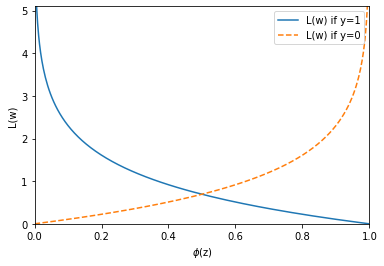

In [7]:
import numpy as np
import matplotlib.pyplot as plt
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))
def cost_1(z):
    return - np.log(sigmoid(z))
def cost_0(z):
    return - np.log(1 - sigmoid(z))
z = np.arange(-10, 10, 0.1)
phi_z = sigmoid(z)
c1 = [cost_1(x) for x in z]
plt.plot(phi_z, c1, label='L(w) if y=1')
c0 = [cost_0(x) for x in z]
plt.plot(phi_z, c0, linestyle='--', label='L(w) if y=0')
plt.ylim(0.0, 5.1)
plt.xlim([0, 1])
plt.xlabel('$\phi$(z)')
plt.ylabel('L(w)')
plt.legend(loc='best')
plt.show()